In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Data Cleaning

In [80]:
# loading the data
df = pd.read_csv('../dataset/kofio_dataset/kofio_dataset.csv',sep='\t')
df.head(2)

,Item Name,Roastery,Roast Level,Region,Flavour Profile,Roast Type,Process,Variety,Brewing Method,Coffee Origin,Rating,Recommended,Price
0,Ethiopia Jenny's BARREL COFFEE - maturing in w...,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni (recommended for both Filter & Espresso C...,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,4.5,96%,"14,99"
1,Rwanda KIRAMBO,The naughty dog,Omni,Nyamasheke District,"Milk chocolate,Blueberries,Mulled wine,Lemon m...",Omni (recommended for both Filter & Espresso C...,Natural,Red Bourbon,"Aeropress,Chemex,Clever dripper,French Press,H...",Rwanda,4.4,100%,"11,99"


In [81]:
print(df.count())
print(f'\nItems without NULL value: {df.dropna().count()[0]}')
# what is that?
# selected_columns = [['Rating', 'Recommended', 'Price'], ['Roast Level', 'Brewing Method', 'Flavour Profile']]
# print(df[selected_columns[0] + selected_columns[1]].count()[0])


Item Name          322
Roastery           322
Roast Level        283
Region             309
Flavour Profile    320
Roast Type         283
Process            301
Variety            241
Brewing Method     283
Coffee Origin      320
Rating             111
Recommended        111
Price              179
dtype: int64

Items without NULL value: 53


In [82]:
# Change the type of Price/Recommended to float/int
df['Price'] = df['Price'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)
df['Recommended'] = df['Recommended'].apply(lambda x: int(x.replace('%', ''))if isinstance(x, str) else x)
df['Roast Type'] = df['Roast Type'].replace('Omni (recommended for both Filter & Espresso Coffee)', 'Omni')

In [83]:
# Data with prices, ratings and recommended
df_fig2 = df.copy()
df_fig2.dropna(subset=['Price','Rating','Recommended'], inplace=True)
df_fig2.info()
df_fig2.loc[:,['Item Name', 'Roastery', 'Price', 'Rating', 'Recommended']].head(5)
df_fig2.to_csv('../dataset/kofio_dataset/price_rating_rec_clean.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 214
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item Name        72 non-null     object 
 1   Roastery         72 non-null     object 
 2   Roast Level      64 non-null     object 
 3   Region           70 non-null     object 
 4   Flavour Profile  72 non-null     object 
 5   Roast Type       64 non-null     object 
 6   Process          62 non-null     object 
 7   Variety          66 non-null     object 
 8   Brewing Method   64 non-null     object 
 9   Coffee Origin    72 non-null     object 
 10  Rating           72 non-null     float64
 11  Recommended      72 non-null     float64
 12  Price            72 non-null     float64
dtypes: float64(3), object(10)
memory usage: 7.9+ KB


In [84]:
# Data with flavour, roast level clusters
df_fig3 = df.loc[:,['Item Name', 'Roastery', 'Roast Level',	'Region', 'Flavour Profile', 'Roast Type', 'Process', 'Variety', 'Brewing Method', 'Coffee Origin']].copy()
df_fig3 = df_fig3.dropna()
df_fig3.info()
df_fig3.head(5)
df_fig3.to_csv('../dataset/kofio_dataset/cluster_clean.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 321
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Item Name        201 non-null    object
 1   Roastery         201 non-null    object
 2   Roast Level      201 non-null    object
 3   Region           201 non-null    object
 4   Flavour Profile  201 non-null    object
 5   Roast Type       201 non-null    object
 6   Process          201 non-null    object
 7   Variety          201 non-null    object
 8   Brewing Method   201 non-null    object
 9   Coffee Origin    201 non-null    object
dtypes: object(10)
memory usage: 17.3+ KB


### Visulasations for Figure 2 (price/rating/brand)

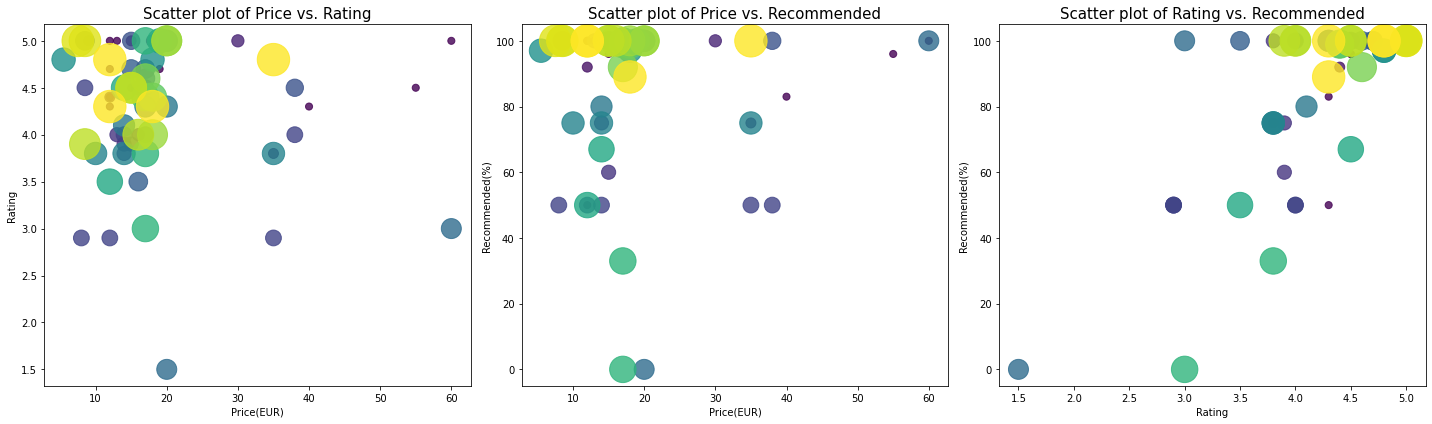

In [127]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

unique_vals, label_indices = pd.factorize(df_fig2["Roastery"])
unique_vals += 1 # this is done to remove value 0
x, y  = df_fig2["Price"], df_fig2["Rating"]

# Price vs. Rating
ax1.scatter(df_fig2["Price"], df_fig2["Rating"], c=unique_vals, s=unique_vals*50, alpha=0.8)
ax1.set(xlabel= "Price(EUR)", ylabel = "Rating")
ax1.set_title("Scatter plot of Price vs. Rating", fontsize=15)

# Scatter plot of Price vs. Recommended
ax2.scatter(df_fig2["Price"],  df_fig2["Recommended"], c=unique_vals, s=unique_vals*50, alpha=0.8)
ax2.set(xlabel= "Price(EUR)", ylabel = "Recommended(%)")
ax2.set_title("Scatter plot of Price vs. Recommended", fontsize=15)

# Scatter plot of Rating vs. Recommended
ax3.scatter(df_fig2["Rating"], df_fig2["Recommended"], c=unique_vals, s=unique_vals*50, alpha=0.8)
ax3.set(xlabel= "Rating", ylabel = "Recommended(%)")
ax3.set_title("Scatter plot of Rating vs. Recommended", fontsize=15)


fig.tight_layout()
fig.savefig("images/brand_price_rating.jpg")


In [123]:

# alternative display:
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='Price', y='Rating', data=df_fig2)
# plt.title('Scatter plot of Price vs. Rating')
# plt.show()

# alternative display:
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='Price', y='Recommended', data=df_fig2)
# plt.title('Scatter plot of Price vs. Recommended')
# plt.ylabel('Recommended(%)')
# plt.show()

# alternative display:
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='Rating', y='Recommended', data=df_fig2)
# plt.title('Scatter plot of Rating vs. Recommended')
# plt.ylabel('Recommended(%)')
# plt.show()

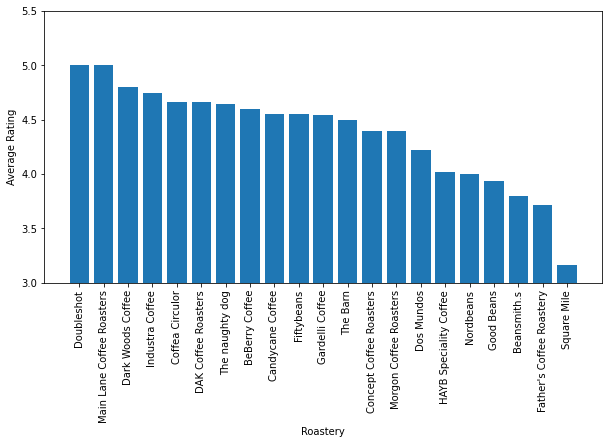

In [124]:
df_mean = df_fig2.groupby('Roastery')['Rating'].mean().sort_values(ascending=False)
# print(df_mean)

plt.figure(figsize=(10, 5))
plt.bar(df_mean.index, df_mean.values)

plt.xlabel('Roastery')
plt.ylabel('Average Rating')
plt.ylim([3,5.5])
plt.xticks(rotation=90)

plt.show()

### Data Analysis for Figure 3

In [154]:
# flavours
flavour_lists=df_fig3['Flavour Profile'].str.split(',').tolist()
flavours = list(set([flavour for flavour_list in flavour_lists for flavour in flavour_list]))
print(f'There\'re {len(flavours)} unique flavours: {flavours[0:3]}...')

# brewing
brewing_lists=df_fig3['Brewing Method'].str.split(',').tolist()
methods = list(set([brewing for brewing_list in brewing_lists for brewing in brewing_list]))
print(f'There\'re {len(methods)} unique brewing methods: {methods}')

# roast level
level_lists=df_fig3['Roast Level'].str.split(',').tolist()
levels = list(set([level for level_list in level_lists for level in level_list]))
print(f'There\'re {len(levels)} unique Roast Levels: {levels}')

# roast type
type_lists=df_fig3['Roast Type'].str.split(',').tolist()
types = list(set([type_ for type_list in type_lists for type_ in type_list]))
print(f'There\'re {len(types)} unique Roast Types: {types}')

There're 194 unique flavours: ['Flower honey', 'Black tea with lemon', 'Coke']...
There're 8 unique brewing methods: ['Vacuum Pot', 'Hario V60', 'Clever dripper', 'Espresso', 'Chemex', 'Moka pot', 'Aeropress', 'French Press']
There're 3 unique Roast Levels: ['Light to Medium Light', 'Medium to medium dark', 'Omni']
There're 3 unique Roast Types: ['Filter', 'Espresso', 'Omni']
